In [2]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [3]:
def cv_show(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Image 1

In [187]:
img = cv2.cvtColor(io.imread("tasks/text/text1.jpg"), cv2.COLOR_BGR2RGB)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [188]:
retval, threshold = cv2.threshold(grayscaled, 160, 255, cv2.THRESH_BINARY)

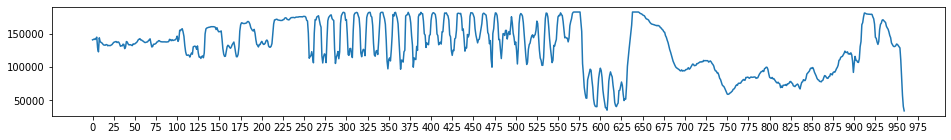

In [189]:
plt.figure(figsize=(16, 2))
plt.xticks(ticks=range(0, 1000, 25))
plt.plot(np.sum(threshold, axis=1))


In [190]:
first_threshold = 140
second_threshold = 570

In [191]:
threshold[0:first_threshold, :] = 255
threshold[second_threshold:, :] = 255

In [192]:
x1, x2 = 580, 630
y1, y2 = 30, 345
threshold[x1:x2, y1:y2] = adaptive(cv2.bitwise_not(grayscaled[x1:x2, y1:y2]))

In [193]:
x1, x2 = 580, 630
y1, y2 = 370, 680
threshold[x1:x2, y1:y2] = adaptive(cv2.bitwise_not(grayscaled[x1:x2, y1:y2]))

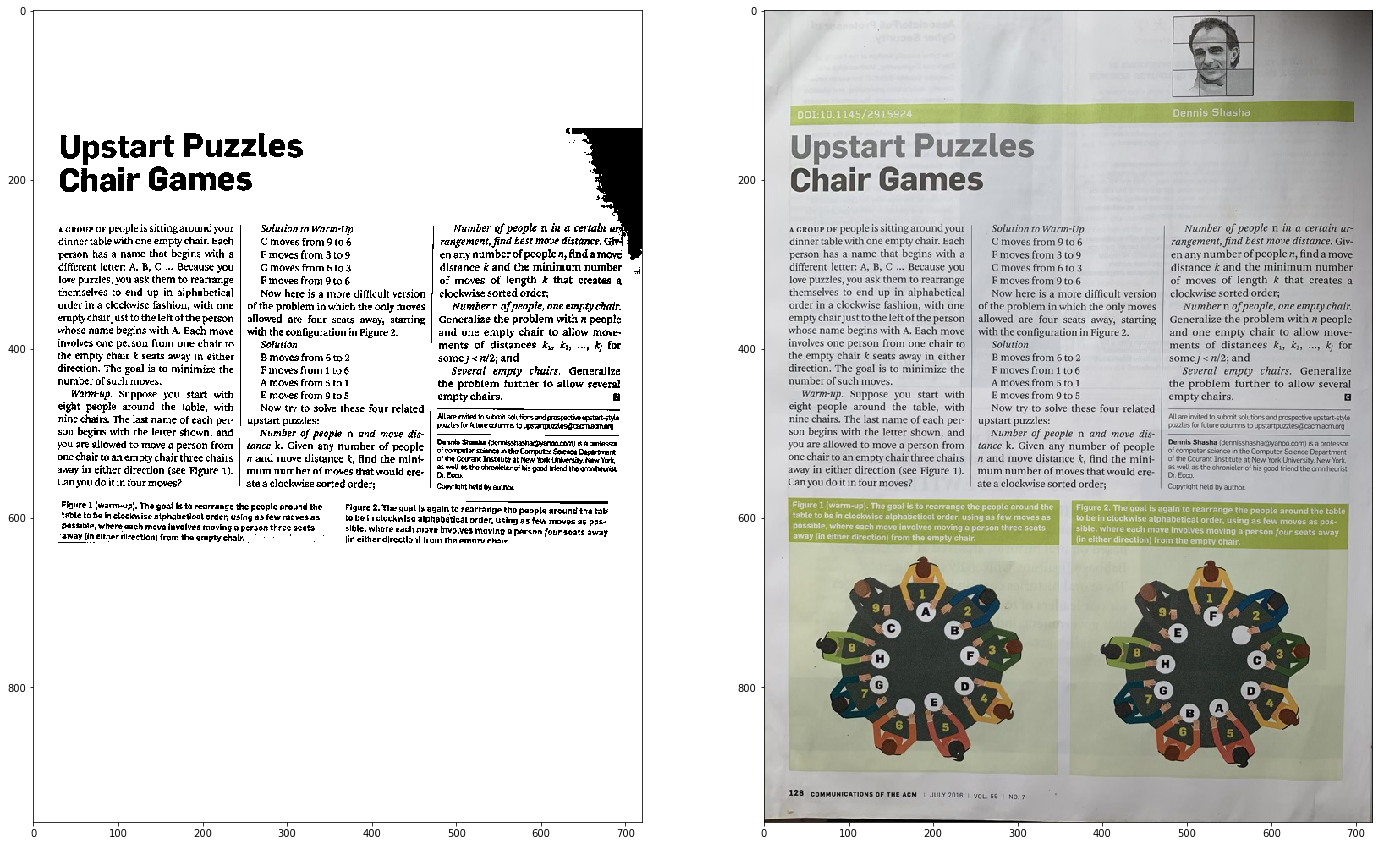

In [194]:
plt.figure(figsize=(24, 16))
plt.subplot(1, 2, 1)
plt.imshow(threshold, cmap='gray')
plt.subplot(1, 2, 2)
cv_show(img)

In [6]:
def thresholding(grayscaled, th):
    retval, threshold = cv2.threshold(grayscaled, th, 255, cv2.THRESH_BINARY)
    return threshold

def nlDenoise(grayscaled, blur=80, k=8, w_size=15):
    return cv2.fastNlMeansDenoising(grayscaled,None,blur,k,w_size)

def blur_threshold(grayscaled, th, k_size=5):
    image1 = cv2.GaussianBlur(grayscaled,(k_size,k_size),0) 
    ret, image2 = cv2.threshold(image1, th, 255, cv2.THRESH_BINARY)
    return image2

def dilate_erode(grayscaled):
    kernel = np.array([[0,1,0], [1,1,1],[0,1,0]], np.uint8) 
    image1 = cv2.dilate(grayscaled, kernel, iterations=1) 
    image2 = cv2.erode(image1, kernel, iterations=1)
    return image2

def erode_dilate(grayscaled):
    kernel = np.array([[0,1,0], [1,1,1],[0,1,0]], np.uint8) 
    image1 = cv2.dilate(grayscaled, kernel, iterations=1) 
    image2 = cv2.erode(image1, kernel, iterations=1)
    return image2

def adaptive(grayscaled, blocksize=15, param=5):
    return cv2.adaptiveThreshold(grayscaled, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blocksize, param)

def otsu(grayscaled):
    retval, im = cv2.threshold(grayscaled, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return im


## Image 2

In [290]:
img = cv2.cvtColor(io.imread("tasks/text/text2.jpg"), cv2.COLOR_BGR2RGB)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [291]:
threshold = (np.ones(grayscaled.shape) * 255).astype(int)

In [292]:
x1, x2 = 0, 115
y1, y2 = 0, 720
threshold[x1:x2, y1:y2] = thresholding(
    nlDenoise(adaptive(cv2.bitwise_not(grayscaled[x1:x2, y1:y2]), blocksize=31, param=2)), th=50)

In [293]:
x1, x2 = 450, 650
y1, y2 = 125, 600
threshold[x1:x2, y1:y2] = (adaptive(cv2.bitwise_not(grayscaled[x1:x2, y1:y2]), blocksize=101, param=24))

In [294]:
x1, x2 = 800, 900
y1, y2 = 125, 600
threshold[x1:x2, y1:y2] = (adaptive(cv2.bitwise_not(grayscaled[x1:x2, y1:y2]), blocksize=101, param=28))

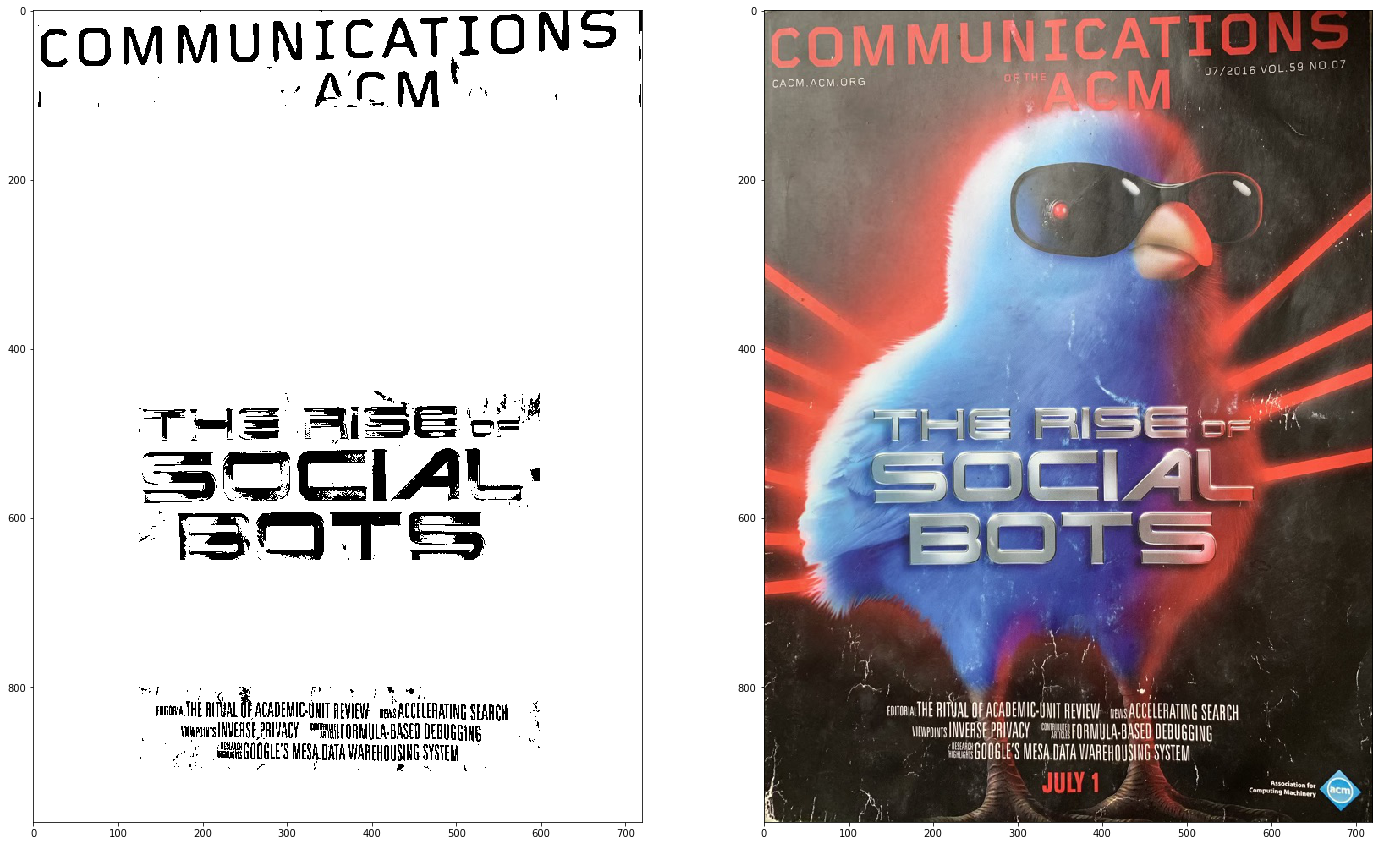

In [295]:
plt.figure(figsize=(24, 16))
plt.subplot(1, 2, 1)
plt.imshow(threshold, cmap='gray')
plt.subplot(1, 2, 2)
cv_show(img)

## Image 3

In [338]:
img = cv2.cvtColor(io.imread("tasks/text/text3.jpg"), cv2.COLOR_BGR2RGB)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayscaled = cv2.bitwise_not(grayscaled)
threshold = thresholding(nlDenoise(adaptive(grayscaled), blur=60), th=190)

In [339]:
threshold[700:895, :] = 255

In [340]:
x1, x2 = 800, 870
y1, y2 = 55, 355
threshold[x1:x2, y1:y2] = adaptive(cv2.bitwise_not(grayscaled[x1:x2, y1:y2]), blocksize=31, param=2)

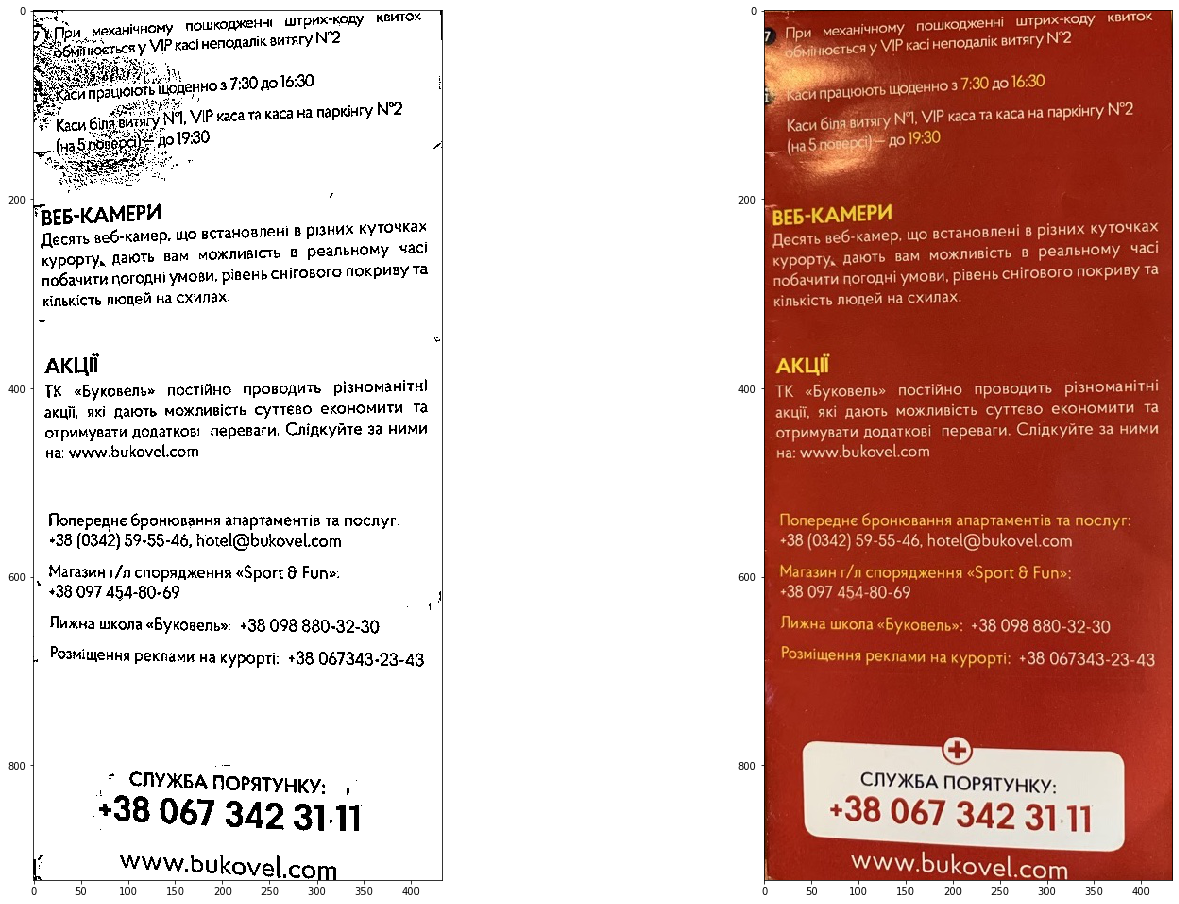

In [341]:
plt.figure(figsize=(24, 16))
plt.subplot(1, 2, 1)
plt.imshow(threshold, cmap='gray')
plt.subplot(1, 2, 2)
cv_show(img)

## Image 4

In [42]:
img = cv2.cvtColor(io.imread("tasks/text/text4.jpg"), cv2.COLOR_BGR2RGB)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
threshold = thresholding(nlDenoise(adaptive(grayscaled), blur=70), th=190)

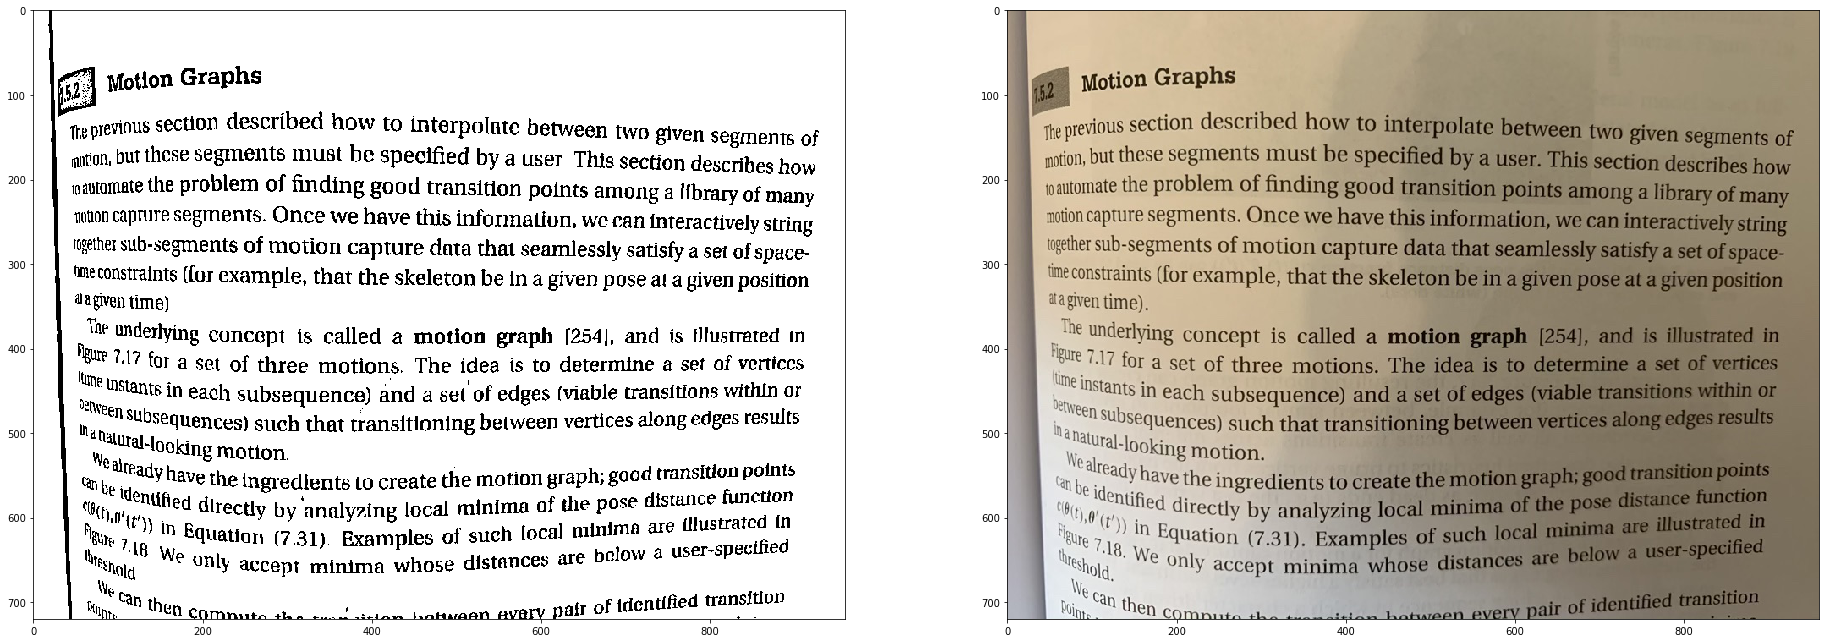

In [45]:
plt.figure(figsize=(24, 24))
plt.subplot(1, 2, 1)
plt.imshow(threshold, cmap='gray')
plt.subplot(1, 2, 2)
cv_show(img)

## Image 5

In [46]:
img = cv2.cvtColor(io.imread("tasks/text/text5.jpg"), cv2.COLOR_BGR2RGB)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayscaled = cv2.bitwise_not(grayscaled)
threshold = thresholding(nlDenoise(adaptive(grayscaled, blocksize=5, param=15), blur=50, k=8), th=200)

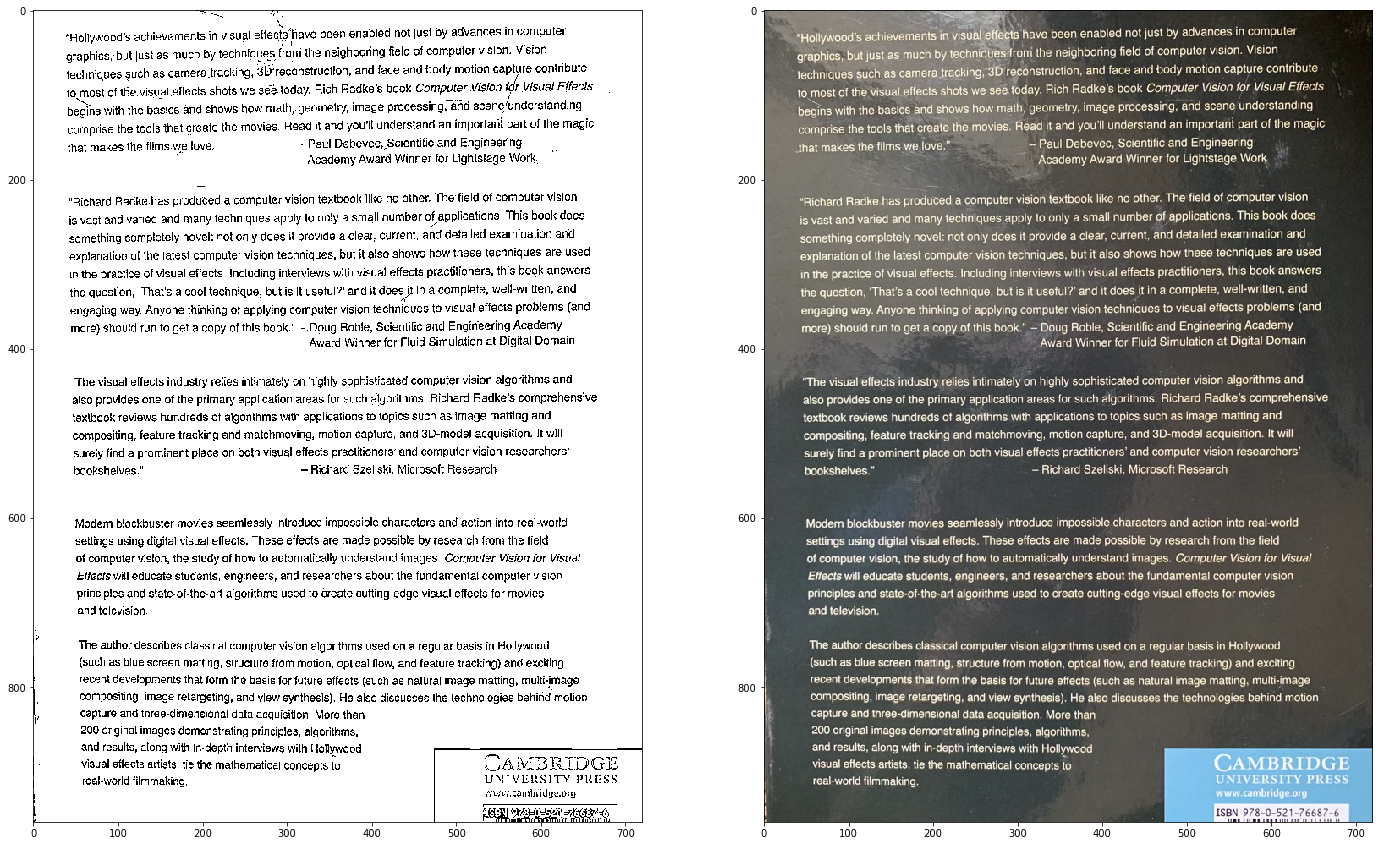

In [47]:
plt.figure(figsize=(24, 16))
plt.subplot(1, 2, 1)
plt.imshow(threshold, cmap='gray')
plt.subplot(1, 2, 2)
cv_show(img)

## Image 6

In [48]:
img = cv2.cvtColor(io.imread("tasks/text/text6.jpg"), cv2.COLOR_BGR2RGB)
grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayscaled = cv2.bitwise_not(grayscaled)
threshold = thresholding(nlDenoise(adaptive(grayscaled, blocksize=5, param=15), blur=50, k=8), th=200)

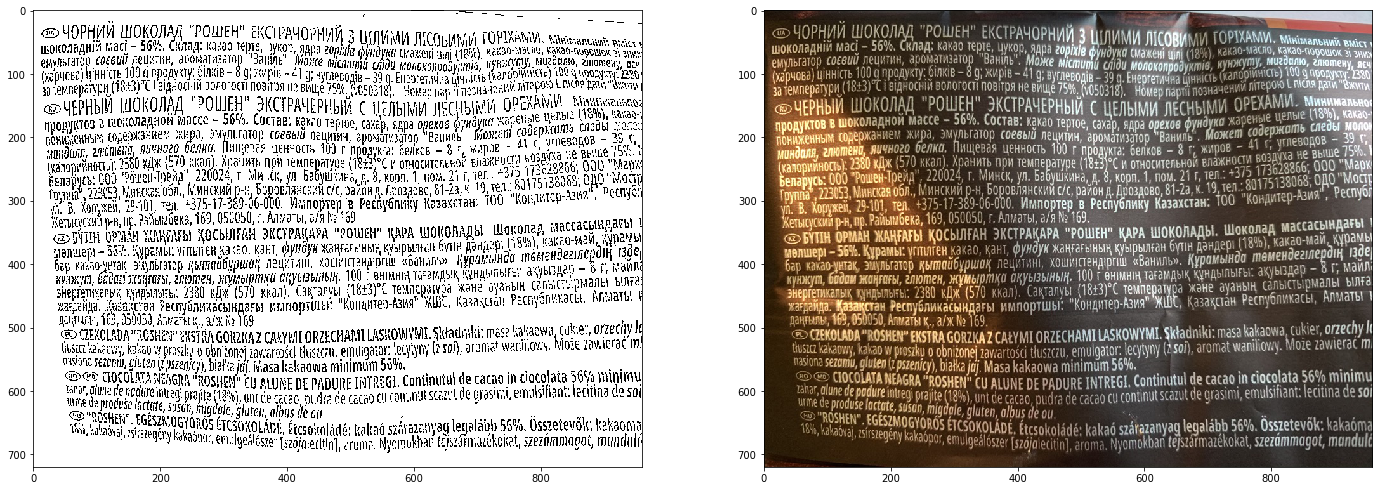

In [49]:
plt.figure(figsize=(24, 16))
plt.subplot(1, 2, 1)
plt.imshow(threshold, cmap='gray')
plt.subplot(1, 2, 2)
cv_show(img)